#Reading the Data, Understanding the Data, Exploratory Data Analysis, Splitting the Data, 
#Training and Testing, Modeling, Accuracy

In [1]:
#import libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#Read the data
fraud = pd.read_csv("fraudTrain.csv")
fraud.head(3)

,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,...,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
0,0,2019-01-01 00:00:18,2703186189652095,"fraud_Rippin, Kub and Mann",misc_net,4.97,Jennifer,Banks,F,561 Perry Cove,...,36.0788,-81.1781,3495,"Psychologist, counselling",1988-03-09,0b242abb623afc578575680df30655b9,1325376018,36.011293,-82.048315,0
1,1,2019-01-01 00:00:44,630423337322,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,Stephanie,Gill,F,43039 Riley Greens Suite 393,...,48.8878,-118.2105,149,Special educational needs teacher,1978-06-21,1f76529f8574734946361c461b024d99,1325376044,49.159047,-118.186462,0
2,2,2019-01-01 00:00:51,38859492057661,fraud_Lind-Buckridge,entertainment,220.11,Edward,Sanchez,M,594 White Dale Suite 530,...,42.1808,-112.2620,4154,Nature conservation officer,1962-01-19,a1a22d70485983eac12b5b88dad1cf95,1325376051,43.150704,-112.154481,0


In [3]:
fraud.columns

Index(['Unnamed: 0', 'trans_date_trans_time', 'cc_num', 'merchant', 'category',
       'amt', 'first', 'last', 'gender', 'street', 'city', 'state', 'zip',
       'lat', 'long', 'city_pop', 'job', 'dob', 'trans_num', 'unix_time',
       'merch_lat', 'merch_long', 'is_fraud'],
      dtype='object')

In [4]:
#Drop irrrelevant features
fraud = fraud.drop(["Unnamed: 0", "job","dob","city_pop","unix_time", "lat","long"], axis =1)

In [5]:
fraud.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1296675 entries, 0 to 1296674
Data columns (total 16 columns):
 #   Column                 Non-Null Count    Dtype  
---  ------                 --------------    -----  
 0   trans_date_trans_time  1296675 non-null  object 
 1   cc_num                 1296675 non-null  int64  
 2   merchant               1296675 non-null  object 
 3   category               1296675 non-null  object 
 4   amt                    1296675 non-null  float64
 5   first                  1296675 non-null  object 
 6   last                   1296675 non-null  object 
 7   gender                 1296675 non-null  object 
 8   street                 1296675 non-null  object 
 9   city                   1296675 non-null  object 
 10  state                  1296675 non-null  object 
 11  zip                    1296675 non-null  int64  
 12  trans_num              1296675 non-null  object 
 13  merch_lat              1296675 non-null  float64
 14  merch_long        

In [6]:
#Data Cleaning
#No Null values found
#Convert object to date
fraud["trans_date_trans_time"] = pd.to_datetime(fraud["trans_date_trans_time"])

fraud[["category", "gender"]] = fraud[["category","gender"]].astype("category")

In [7]:
fraud.nunique()

trans_date_trans_time    1274791
cc_num                       983
merchant                     693
category                      14
amt                        52928
first                        352
last                         481
gender                         2
street                       983
city                         894
state                         51
zip                          970
trans_num                1296675
merch_lat                1247805
merch_long               1275745
is_fraud                       2
dtype: int64

In [12]:
#Check for duplicates
fraud.duplicated().sum()

0

In [13]:
#Get the Value counts
fraud["is_fraud"].value_counts()
#There is class imbalance

0    1289169
1       7506
Name: is_fraud, dtype: int64

<AxesSubplot:xlabel='is_fraud', ylabel='count'>

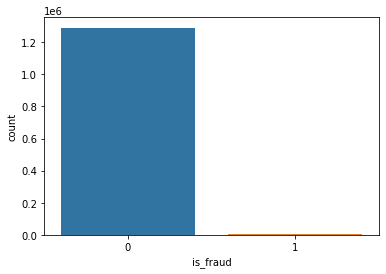

In [16]:
#plt.figure(figsize=(10,10))
sns.countplot(x="is_fraud", data = fraud)

#The samples of target variable is not distributed uniformly so resampling is required

In [14]:
fraud.dtypes

trans_date_trans_time    datetime64[ns]
cc_num                            int64
merchant                         object
category                       category
amt                             float64
first                            object
last                             object
gender                         category
street                           object
city                             object
state                            object
zip                               int64
trans_num                        object
merch_lat                       float64
merch_long                      float64
is_fraud                          int64
dtype: object

In [17]:
fraud.head(2)

,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,city,state,zip,trans_num,merch_lat,merch_long,is_fraud
0,2019-01-01 00:00:18,2703186189652095,"fraud_Rippin, Kub and Mann",misc_net,4.97,Jennifer,Banks,F,561 Perry Cove,Moravian Falls,NC,28654,0b242abb623afc578575680df30655b9,36.011293,-82.048315,0
1,2019-01-01 00:00:44,630423337322,"fraud_Heller, Gutmann and Zieme",grocery_pos,107.23,Stephanie,Gill,F,43039 Riley Greens Suite 393,Orient,WA,99160,1f76529f8574734946361c461b024d99,49.159047,-118.186462,0


In [18]:
fraud.category.value_counts()

gas_transport     131659
grocery_pos       123638
home              123115
shopping_pos      116672
kids_pets         113035
shopping_net       97543
entertainment      94014
food_dining        91461
personal_care      90758
health_fitness     85879
misc_pos           79655
misc_net           63287
grocery_net        45452
travel             40507
Name: category, dtype: int64

In [19]:
#Select features for modelling
fraud_new = fraud.select_dtypes(["int64","float64"])

fraud_new.head()

,cc_num,amt,zip,merch_lat,merch_long,is_fraud
0,2703186189652095,4.97,28654,36.011293,-82.048315,0
1,630423337322,107.23,99160,49.159047,-118.186462,0
2,38859492057661,220.11,83252,43.150704,-112.154481,0
3,3534093764340240,45.00,59632,47.034331,-112.561071,0
4,375534208663984,41.96,24433,38.674999,-78.632459,0


In [21]:
# Import KNeighborsClassifier
from sklearn.neighbors import KNeighborsClassifier 

# Import the module
from sklearn.model_selection import train_test_split

# Create X and y arrays
X = fraud_new.drop("is_fraud", axis=1).values

y = fraud_new["is_fraud"].values


# Split into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1, stratify=y)

knn = KNeighborsClassifier(n_neighbors=5)

# Fit the classifier to the training data
knn.fit(X_train,y_train)

# Predict the labels of the test data: y_pred
y_pred = knn.predict(X_test)


# Import confusion matrix
from sklearn.metrics import classification_report, confusion_matrix

# Generate the confusion matrix and classification report

# Import accuracy_score
from sklearn.metrics import accuracy_score

acc_test = accuracy_score(y_test, y_pred)

print('Test set accuracy of unscaled KNN Classifier: {:.3f}'.format(acc_test))

#print(confusion_matrix(y_test, y_pred))

print(classification_report(y_test, y_pred))

Test set accuracy of unscaled KNN Classifier: 0.995
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    257834
           1       0.57      0.34      0.43      1501

    accuracy                           0.99    259335
   macro avg       0.78      0.67      0.71    259335
weighted avg       0.99      0.99      0.99    259335



In [23]:
#Scaling in a Pipeline

# Import KNeighborsClassifier
from sklearn.neighbors import KNeighborsClassifier 

# Import the module
from sklearn.model_selection import train_test_split

#Import Standard Scaler
from sklearn.preprocessing import StandardScaler

#Import Pipeline
from sklearn.pipeline import Pipeline

# Create X and y arrays
X = fraud_new.drop("is_fraud", axis=1).values

y = fraud_new["is_fraud"].values

#Steps in a pipeline
steps = [('scaler', StandardScaler()), ('knn', KNeighborsClassifier(n_neighbors=6))]

pipeline = Pipeline(steps)


# Split into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,random_state=1, stratify =y)


# Fit the pipeline to the training data
knn_scaled = pipeline.fit(X_train, y_train)

# Predict the labels of the test data: y_pred
y_pred = knn_scaled.predict(X_test)


#Metrics for model evaluation 

# Import classification report
from sklearn.metrics import classification_report, confusion_matrix

# Generate the confusion matrix and classification report

# Import accuracy_score
from sklearn.metrics import accuracy_score

acc_test = accuracy_score(y_test, y_pred)

print('Test set accuracy of KNN Classifier : {:.3f}'.format(acc_test))

#print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

Test set accuracy of KNN Classifier : 0.994
              precision    recall  f1-score   support

           0       1.00      1.00      1.00    257834
           1       0.52      0.18      0.26      1501

    accuracy                           0.99    259335
   macro avg       0.76      0.59      0.63    259335
weighted avg       0.99      0.99      0.99    259335

